# Using Natural Language Processing to Generate New Recipes in Python
## Task 2: Exploratory Data Analysis and Preprocessing

In [1]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 200
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

import pandas as pd
import json

In [2]:
data = json.load(open('Dataset/recipes_raw_nosource_ar.json', 'r'))

In [3]:
# import data keys
keys = list(data.keys())
data[keys[0]]

{'title': 'Slow Cooker Chicken and Dumplings',
 'ingredients': ['4 skinless, boneless chicken breast halves ADVERTISEMENT',
  '2 tablespoons butter ADVERTISEMENT',
  '2 (10.75 ounce) cans condensed cream of chicken soup ADVERTISEMENT',
  '1 onion, finely diced ADVERTISEMENT',
  '2 (10 ounce) packages refrigerated biscuit dough, torn into pieces ADVERTISEMENT',
  'ADVERTISEMENT'],
 'instructions': 'Place the chicken, butter, soup, and onion in a slow cooker, and fill with enough water to cover.\nCover, and cook for 5 to 6 hours on High. About 30 minutes before serving, place the torn biscuit dough in the slow cooker. Cook until the dough is no longer raw in the center.\n',
 'picture_link': '55lznCYBbs2mT8BTx6BTkLhynGHzM.S'}

In [11]:
# iterate over other different data sources:all recipes, epicuriuos, foodnetwork
recipe_sources = ['ar', 'epi','fn']

In [14]:
# creat a data frame
df = pd.DataFrame()

sources, titles, ingredients, instructions = [], [], [], []

for recipe_source in recipe_sources:
    # read the data
    data = json.load(
        open(f'Dataset/recipes_raw_nosource_{recipe_source}.json', 'r'))
    
   # iterate over every single entry
    for _, recipe in data.items():
        # additional check if a recipe doesnot have
        if ('title' in recipe) and ('ingredients' in recipe) and ('instructions' in recipe):
            sources.append(recipe_source)
            # index recipe by title
            titles.append(recipe['title'])
            # replace the word ADVERTISEMENT within each entry of the list with empty string: for loop
            ingredients.append([
                ingredient.replace(
                    'ADVERTISEMENT', '') for ingredient in recipe['ingredients']])
            # again replace ADVERTISEMENT word, also the new line characters(\n)
            instructions.append(
                 str(recipe['instructions']).replace(
                     'ADVERTISEMENT', '').replace('\n', ' '))   
            
df['sources'] = sources
df['title'] = titles
df['ingredients'] = ingredients
df['instructions'] = instructions

In [15]:
# save
df.to_pickle('temp.pkl')

In [19]:
df['ingredients_count']= df['ingredients'].str.len().fillna(0).astype(int)
df['instructions_length']= df['instructions'].str.split().str.len().fillna(
    0).astype(int)

In [20]:
df.head()

,sources,title,ingredients,instructions,ingredients_count,instructions_length
0,ar,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves , ...","Place the chicken, butter, soup, and onion in ...",6,53
1,ar,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",5,44
2,ar,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar , 1/2 cup ketchup ...",Preheat oven to 350 degrees F (175 degrees C)....,11,67
3,ar,Best Chocolate Chip Cookies,"[1 cup butter, softened , 1 cup white sugar , ...",Preheat oven to 350 degrees F (175 degrees C)....,12,74
4,ar,Homemade Mac and Cheese Casserole,"[8 ounces whole wheat rotini pasta , 3 cups fr...",Preheat oven to 350 degrees F. Line a 2-quart ...,14,175


<AxesSubplot:xlabel='sources', ylabel='ingredients_count'>

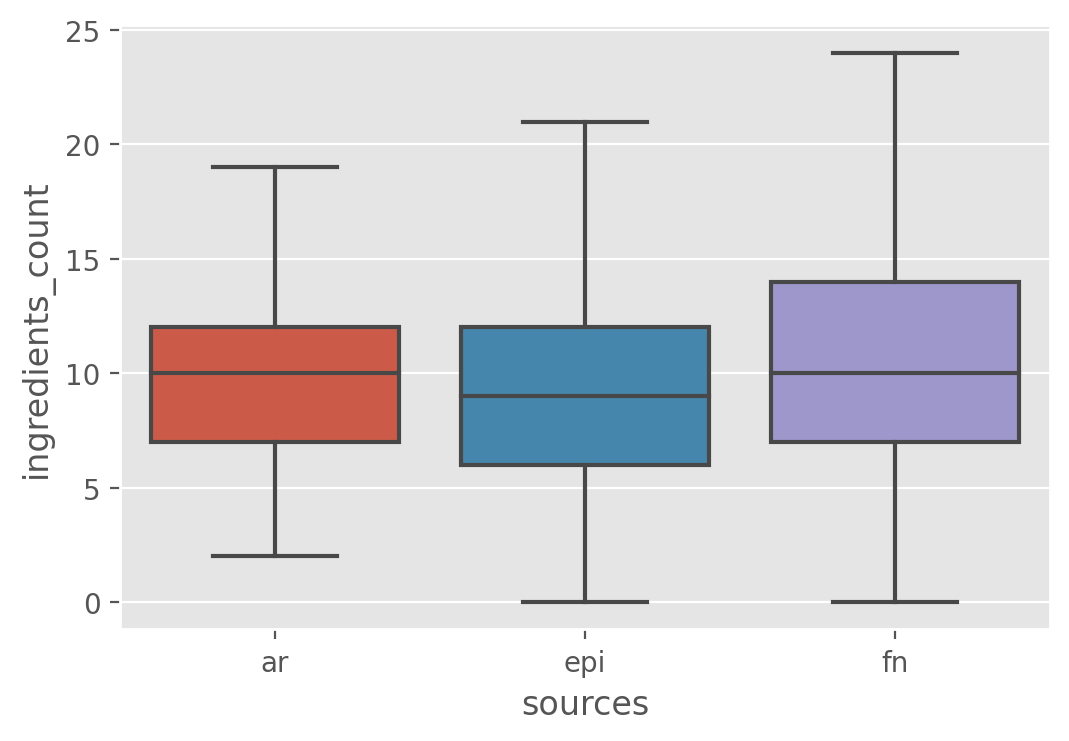

In [24]:
sns.boxplot(data=df, x='sources', y='ingredients_count', showfliers=False)

Foodnetwork (fn) source seems to have slightly more ingredients count

<AxesSubplot:xlabel='sources', ylabel='instructions_length'>

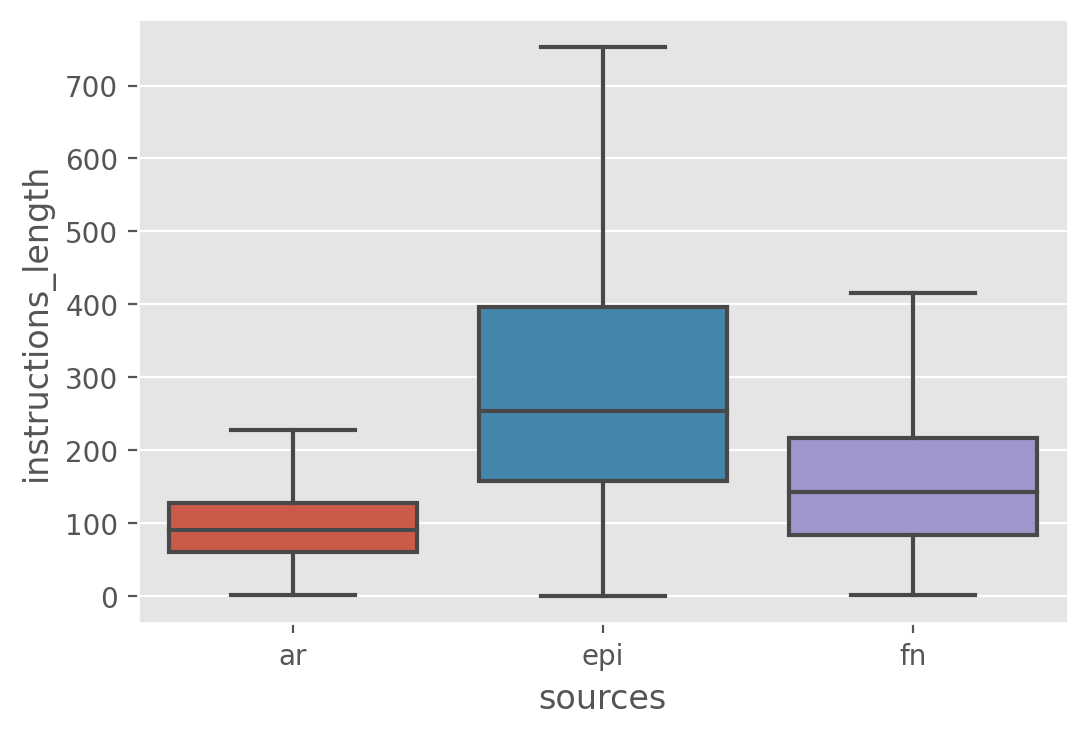

In [26]:
sns.boxplot(data=df, x='sources', y='instructions_length', showfliers=False)

Epicuriuos source seems to have larger instructions length, good to know for modeling

In [27]:
df.to_pickle('df_recipes_raw.pkl')